# EOQ

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import Pareto
import pandas as pd
import seaborn as sns

In [113]:
excel_file=pd.ExcelFile("EOQ.xlsx")

In [114]:
excel_file.sheet_names

['Instructions', 'Lead time info', 'Data']

# Step 1

In [129]:
excel_file.parse('Instructions').iloc[0,1]

'To identify the 20% of products that represent 80% of the stock costs'

In [155]:
data=excel_file.parse('Data')
data

,Product,January,February,March,April,May,June,July,August,September,October,November,December,Quantity,Unit cost($),Ordering cost
0,Compresses,65,61,56,68,68,69,65,62,65,63,63,60,765,5.0,45
1,Syringes,23,21,21,21,20,23,21,24,22,22,21,21,260,13.5,125
2,Fro thermometers,7,10,7,8,8,9,9,8,8,8,8,10,100,27.2,150
3,Elec blood pressure monitors,27,27,25,25,28,25,23,28,22,24,24,22,300,179.0,1600
4,Stethoscopes,12,12,11,11,12,9,10,12,11,10,11,9,130,39.0,350
5,Vinyl gloves,33,28,35,38,35,33,28,33,30,33,33,31,390,5.2,50
6,Protetive masks,31,30,33,33,31,26,26,28,30,30,28,24,350,28.0,250
7,Infrared lights,22,21,22,20,21,21,17,15,18,23,21,19,240,312.0,2800
8,Weighing scales,11,9,11,7,9,8,11,7,8,10,7,7,105,59.0,530


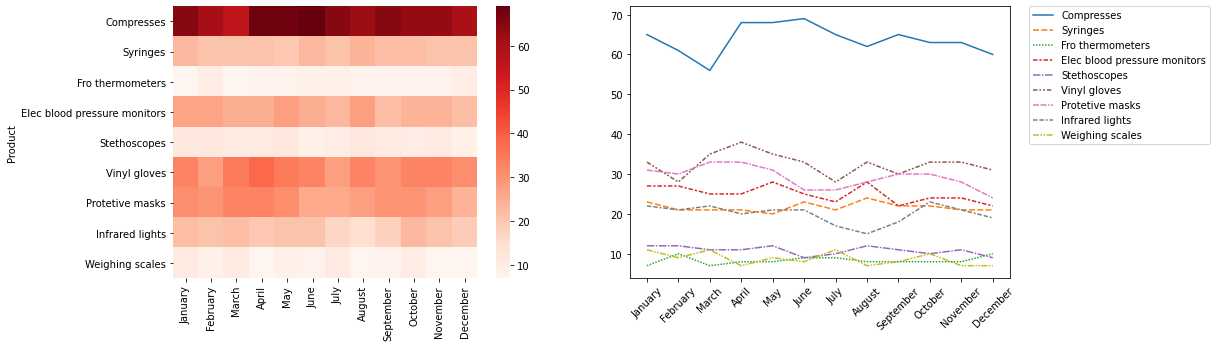

In [156]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
heat_map_data=data.set_index("Product").iloc[:,:12]
sns.heatmap(heat_map_data, cmap="Reds", ax=axs[0])
sns.lineplot(data=heat_map_data.T, ax=axs[1])
axs[1].set_xticklabels(heat_map_data.columns, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Tabla Pareto

                        Product  Quantity  ponderado  % acumulado
0                    Compresses       765   0.289773          29%
5                  Vinyl gloves       390   0.147727          44%
6               Protetive masks       350   0.132576          57%
3  Elec blood pressure monitors       300   0.113636          68%
1                      Syringes       260   0.098485          78%
7               Infrared lights       240   0.090909          87%
4                  Stethoscopes       130   0.049242          92%
8               Weighing scales       105   0.039773          96%
2              Fro thermometers       100   0.037879         100%



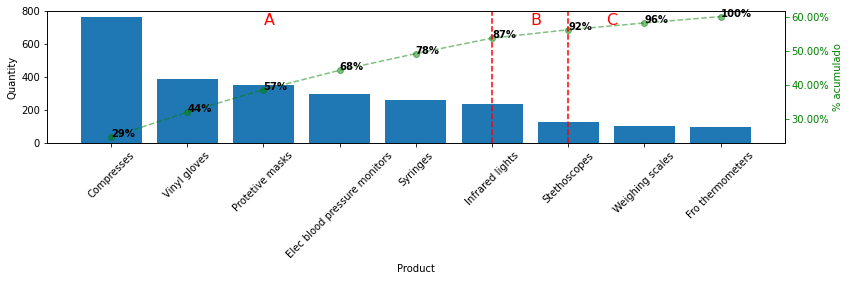

In [158]:
Pareto.pareto_plot(data, x="Product", y="Quantity")


Tabla Pareto

                        Product  Stock cost  ponderado  % acumulado
7               Infrared lights     74880.0   0.463000          46%
3  Elec blood pressure monitors     53700.0   0.332039          80%
6               Protetive masks      9800.0   0.060596          86%
8               Weighing scales      6195.0   0.038305          89%
4                  Stethoscopes      5070.0   0.031349          93%
0                    Compresses      3825.0   0.023651          95%
1                      Syringes      3510.0   0.021703          97%
2              Fro thermometers      2720.0   0.016818          99%
5                  Vinyl gloves      2028.0   0.012540         100%



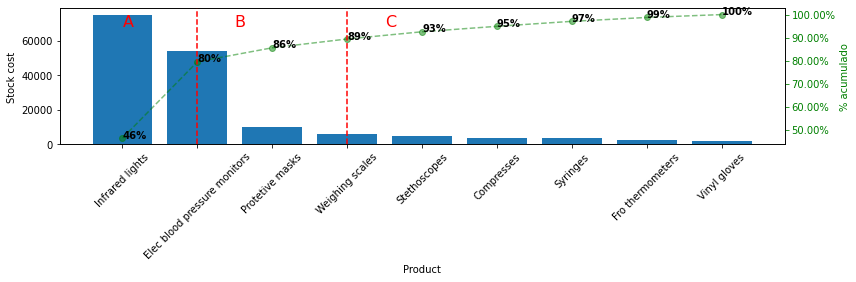

In [159]:
data["Stock cost"]=data["Quantity"]*data["Unit cost($)"]
Pareto.pareto_plot(data, x="Product", y="Stock cost")

# Step 2

In [161]:
excel_file.parse('Instructions').iloc[1,1]

'To calculate reorder point'

In [163]:
excel_file.sheet_names

['Instructions', 'Lead time info', 'Data']

In [165]:
excel_file.parse('Lead time info')

,Time (days),Activity
0,1,Order placing
1,1,Receipt and acceptance of the order by the sup...
2,2,Processing of the order by the supplier
3,15,Disparch and transport
4,1,Receipt in the warehous


In [167]:
lead_time=excel_file.parse('Lead time info')["Time (days)"].sum()
lead_time

20

In [168]:
data["Daily Average"]=data["Quantity"]/365

In [170]:
data

,Product,January,February,March,April,May,June,July,August,September,October,November,December,Quantity,Unit cost($),Ordering cost,Stock cost,Daily Average
0,Compresses,65,61,56,68,68,69,65,62,65,63,63,60,765,5.0,45,3825.0,2.095890
1,Syringes,23,21,21,21,20,23,21,24,22,22,21,21,260,13.5,125,3510.0,0.712329
2,Fro thermometers,7,10,7,8,8,9,9,8,8,8,8,10,100,27.2,150,2720.0,0.273973
3,Elec blood pressure monitors,27,27,25,25,28,25,23,28,22,24,24,22,300,179.0,1600,53700.0,0.821918
4,Stethoscopes,12,12,11,11,12,9,10,12,11,10,11,9,130,39.0,350,5070.0,0.356164
5,Vinyl gloves,33,28,35,38,35,33,28,33,30,33,33,31,390,5.2,50,2028.0,1.068493
6,Protetive masks,31,30,33,33,31,26,26,28,30,30,28,24,350,28.0,250,9800.0,0.958904
7,Infrared lights,22,21,22,20,21,21,17,15,18,23,21,19,240,312.0,2800,74880.0,0.657534
8,Weighing scales,11,9,11,7,9,8,11,7,8,10,7,7,105,59.0,530,6195.0,0.287671


In [176]:
data["Max"]=data.iloc[:,1:13].max(axis=1)
data["Daily average Max"]=data["Max"]/30

In [181]:
data["Safety stock"]=(data["Daily average Max"]-data["Daily Average"])*lead_time
data["Safety stock"]=data["Safety stock"].apply(lambda x:np.ceil(x))
data

,Product,January,February,March,April,May,June,July,August,September,October,November,December,Quantity,Unit cost($),Ordering cost,Stock cost,Daily Average,Max,Daily average Max,Safety stock
0,Compresses,65,61,56,68,68,69,65,62,65,63,63,60,765,5.0,45,3825.0,2.095890,69,2.300000,5.0
1,Syringes,23,21,21,21,20,23,21,24,22,22,21,21,260,13.5,125,3510.0,0.712329,24,0.800000,2.0
2,Fro thermometers,7,10,7,8,8,9,9,8,8,8,8,10,100,27.2,150,2720.0,0.273973,10,0.333333,2.0
3,Elec blood pressure monitors,27,27,25,25,28,25,23,28,22,24,24,22,300,179.0,1600,53700.0,0.821918,28,0.933333,3.0
4,Stethoscopes,12,12,11,11,12,9,10,12,11,10,11,9,130,39.0,350,5070.0,0.356164,12,0.400000,1.0
5,Vinyl gloves,33,28,35,38,35,33,28,33,30,33,33,31,390,5.2,50,2028.0,1.068493,38,1.266667,4.0
6,Protetive masks,31,30,33,33,31,26,26,28,30,30,28,24,350,28.0,250,9800.0,0.958904,33,1.100000,3.0
7,Infrared lights,22,21,22,20,21,21,17,15,18,23,21,19,240,312.0,2800,74880.0,0.657534,23,0.766667,3.0
8,Weighing scales,11,9,11,7,9,8,11,7,8,10,7,7,105,59.0,530,6195.0,0.287671,11,0.366667,2.0


In [182]:
data["Reorder Point"]=lead_time*data["Daily Average"]+data["Safety stock"]

# Step 3

In [186]:
excel_file.parse('Instructions').iloc[2,1]

'To calculate the EOQ considere an inventory value of $160,000 with total costs of $35,000 '

In [188]:
data.iloc[3,13:]

Quantity                  300
Unit cost($)              179
Ordering cost            1600
Stock cost              53700
Daily Average        0.821918
Max                        28
Daily average Max    0.933333
Safety stock                3
Reorder Point         19.4384
Name: 3, dtype: object

In [189]:
# Define EOQ function
def EOQ(S, D, H, table=True):
    """
    Economic Order Quantity
    
    Arguments:
    S: (float) Cost of placing an order
    D: (int) annual quantity demanded
    H: (float) holding cost per unit
    """
    # Validate that all function arguments are non-negative
    if(S>0 and D>0 and H>0):
        return (np.sqrt((2*S*D)/H))
        
    else: 
        print("-"*40)   
        print("Error. All function arguments must be non-negative.")
        print("-"*40)
# Run example    
EOQ(1600,300,35/160*179)

156.5795606675239

In [192]:
# Define AHC function
def AHC(Q,H):
    import numpy as np
    """
    Annual holding cost
    
    Arguments:
    Q: (int) number of values in array
    H: (float) holding cost per unit

    Returns:
    Array of AHC values for EOQ plot
    """
    # Validate that all function arguments are non-negative
    if(Q>0 and H>0):

        Q = np.arange(1,Q)
        return Q*H/2
    else: 
        print("-"*40)   
        print("Error. All function arguments must be non-negative.")
        print("-"*40)
# Run example    
AHC(150,35/160*179)

array([  19.578125,   39.15625 ,   58.734375,   78.3125  ,   97.890625,
        117.46875 ,  137.046875,  156.625   ,  176.203125,  195.78125 ,
        215.359375,  234.9375  ,  254.515625,  274.09375 ,  293.671875,
        313.25    ,  332.828125,  352.40625 ,  371.984375,  391.5625  ,
        411.140625,  430.71875 ,  450.296875,  469.875   ,  489.453125,
        509.03125 ,  528.609375,  548.1875  ,  567.765625,  587.34375 ,
        606.921875,  626.5     ,  646.078125,  665.65625 ,  685.234375,
        704.8125  ,  724.390625,  743.96875 ,  763.546875,  783.125   ,
        802.703125,  822.28125 ,  841.859375,  861.4375  ,  881.015625,
        900.59375 ,  920.171875,  939.75    ,  959.328125,  978.90625 ,
        998.484375, 1018.0625  , 1037.640625, 1057.21875 , 1076.796875,
       1096.375   , 1115.953125, 1135.53125 , 1155.109375, 1174.6875  ,
       1194.265625, 1213.84375 , 1233.421875, 1253.      , 1272.578125,
       1292.15625 , 1311.734375, 1331.3125  , 1350.890625, 1370.

In [66]:
# Define AOC function
def AOC(D, S, Q):
    import numpy as np
    """
    Annual holding cost
    
    Arguments:
    D: (int) Annual demand
    S: (float) Cost of placing an order
    Q: (int) Number of values in array

    Returns:
    Array of AOC values for EOQ plot
    """
    # Validate that all function arguments are non-negative
    if(D>0 and S>0 and Q>0):

        Q = np.arange(1,Q)
        return D*S/Q
    else: 
        print("-"*40)   
        print("Error. All function arguments must be non-negative.")
        print("-"*40)
# Run example    
AOC(300, 1600, 100)

array([34425.        , 17212.5       , 11475.        ,  8606.25      ,
        6885.        ,  5737.5       ,  4917.85714286,  4303.125     ,
        3825.        ,  3442.5       ,  3129.54545455,  2868.75      ,
        2648.07692308,  2458.92857143,  2295.        ,  2151.5625    ,
        2025.        ,  1912.5       ,  1811.84210526,  1721.25      ,
        1639.28571429,  1564.77272727,  1496.73913043,  1434.375     ,
        1377.        ,  1324.03846154,  1275.        ,  1229.46428571,
        1187.06896552,  1147.5       ,  1110.48387097,  1075.78125   ,
        1043.18181818,  1012.5       ,   983.57142857,   956.25      ,
         930.40540541,   905.92105263,   882.69230769,   860.625     ,
         839.63414634,   819.64285714,   800.58139535,   782.38636364,
         765.        ,   748.36956522,   732.44680851,   717.1875    ,
         702.55102041,   688.5       ,   675.        ,   662.01923077,
         649.52830189,   637.5       ,   625.90909091,   614.73214286,
      

In [193]:
# Define AOC function
def ATC(D, S, Q, H):
    import numpy as np
    """
    Annual total costs
    
    Arguments:
    D: (int) Annual demand
    S: (float) Cost of placing an order
    Q: (int) Number of values in array
    H: (float) holding cost per unit

    Returns:
    Array of AOC values for EOQ plot
    """
    # Validate that all function arguments are non-negative
    if(D>0 and S>0 and Q>0 and H>0):
        
        return AOC(D, S, Q) + AHC(Q, H)
    else: 
        print("-"*40)   
        print("Error. All function arguments must be non-negative.")
        print("-"*40)
# Run example    
ATC(300, 1600, 150, 35/160*179)

array([480019.578125  , 240039.15625   , 160058.734375  , 120078.3125    ,
        96097.890625  ,  80117.46875   ,  68708.47544643,  60156.625     ,
        53509.53645833,  48195.78125   ,  43851.72301136,  40234.9375    ,
        37177.59254808,  34559.80803571,  32293.671875  ,  30313.25      ,
        28568.12224265,  27019.07291667,  25635.14226974,  24391.5625    ,
        23268.28348214,  22248.90056818,  21319.86209239,  20469.875     ,
        19689.453125  ,  18970.56971154,  18306.38715278,  17691.04464286,
        17119.48976293,  16587.34375   ,  16090.79284274,  15626.5       ,
        15191.53267045,  14783.30330882,  14399.52008929,  14038.14583333,
        13697.36359797,  13375.54769737,  13071.23918269,  12783.125     ,
        12510.02019817,  12250.85267857,  12004.65007267,  11770.52840909,
        11547.68229167,  11335.3763587 ,  11132.93783245,  10939.75      ,
        10755.24649235,  10578.90625   ,  10410.24908088,  10248.83173077,
        10094.24439858,  

# Step 4

In [200]:
excel_file.sheet_names
excel_file.parse("Instructions").iloc[3,1]

'Plot the model'

In [215]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

D=300
Q=D
S=1600
H=35/160*179

q=np.arange(1,Q)
y_holding=AHC(Q,H)
y_ordering=AOC(D, S, Q)
y_total=ATC(D, S, Q, H)

y=[y_total, y_ordering, y_holding]
names=['Total costs', 'Ordering costs', 'Holding costs']

fig = go.Figure()

for i in range(3):
  fig.add_trace(go.Scatter(x=q, y=y[i],
                    mode='lines',
                    name=names[i]))

# Edit the layout
fig.update_layout(title='EOQ model',
                   xaxis_title='Q',
                   yaxis_title='Cost',
                   height=500,
                   width=700,
                   xaxis={"range":[0,q.max()]},
                   yaxis={"range":[0,y_total.mean()]})

fig.show()

In [216]:
EOQ(1600,300,35/160*179)

156.5795606675239

In [219]:
data.iloc[3,13:]

Quantity                  300
Unit cost($)              179
Ordering cost            1600
Stock cost              53700
Daily Average        0.821918
Max                        28
Daily average Max    0.933333
Safety stock                3
Reorder Point         19.4384
Name: 3, dtype: object

In [221]:
300/157

1.910828025477707

In [223]:
365/2

182.5

In [249]:
batch_arrivals=np.linspace(1,365,3)
batch_arrivals

array([  1., 183., 365.])

In [248]:
batch_q0=np.zeros(len(batch_arrivals))
batch_q0

array([0., 0., 0.])

In [247]:
batch_q1=np.ones(len(batch_arrivals))*np.ceil(EOQ(1600,300,35/160*179))
batch_q1

array([157., 157., 157.])

In [258]:
df=pd.DataFrame({"Batch time":np.concatenate([batch_arrivals,batch_arrivals]), "Batch q":np.concatenate([batch_q0,batch_q1])})
df=df.sort_values("Batch time").reset_index().drop(columns="index")
df

,Batch time,Batch q
0,1.0,0.0
1,1.0,157.0
2,183.0,0.0
3,183.0,157.0
4,365.0,0.0
5,365.0,157.0


In [262]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df["Batch time"], y=df["Batch q"],
                    mode='lines',
                    name="Batches"))

fig.add_trace(go.Scatter(x=np.arange(0,366), y=np.ones(366)*20,
                    mode='lines',
                    name="Reorder point"))

# Edit the layout
fig.update_layout(title='EOQ reorder time',
                   xaxis_title='Time',
                   yaxis_title='Q',
                   height=500,
                   width=700)

fig.show()

In [265]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

D=300
Q=D
S=1600
H=35/160*179

q=np.arange(1,Q)
y_holding=AHC(Q,H)
y_ordering=AOC(D, S, Q)
y_total=ATC(D, S, Q, H)

y=[y_total, y_ordering, y_holding]
names=['Total costs', 'Ordering costs', 'Holding costs']


fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("EOQ calculation", "Stock cycle with reorder point"))

for i in range(3):
  fig.add_trace(go.Scatter(x=q, y=y[i],
                    mode='lines',
                    name=names[i],),
                    row=1,
                    col=1)
  fig.update_xaxes(title_text="Quantity", row=1, col=1)
  fig.update_yaxes(title_text="Costs", row=1, col=1)
  
fig.add_trace(go.Scatter(x=df["Batch time"], y=df["Batch q"],
                    mode='lines',
                    name="Batches"),
                    row=1,
                    col=2)

fig.add_trace(go.Scatter(x=np.arange(0,366), y=np.ones(366)*20,
                    mode='lines',
                    name="Reorder point"),
                    row=1,
                    col=2)
fig.update_xaxes(title_text="Time", row=1, col=2)
fig.update_yaxes(title_text="Batch size", row=1, col=2)

# Edit the layout
fig.update_layout(title='EOQ analysis',
                   height=500,
                   width=1200,
                   xaxis={"range":[0,q.max()]},
                   yaxis={"range":[0,y_total.mean()]})

fig.show()